## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train

In [11]:
## 資料前處理
from sklearn import preprocessing
def preproc_x(x,flatten=True):
    x=((x-x.min())/(x.max()-x.min()))
    x=x/255
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y,num=10):
    y=keras.utils.to_categorical(y,num)
    return y

In [12]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
"""Code Here
建立你的神經網路
"""
def build_mlp():
    input_layer=keras.layers.Input([x_train.shape[-1]])
    x=keras.layers.Dense(activation="relu",units=512)(input_layer)
    x=keras.layers.Dense(activation="relu",units=256)(x)
    x=keras.layers.Dense(activation="relu",units=128)(x)
    out=keras.layers.Dense(activation="softmax",units=10)(x)
    model=keras.models.Model(input=[input_layer],output=[out])
    return model
    
model=build_mlp()
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss=["categorical_crossentropy"],metrics=["accuracy"])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


In [14]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [15]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [16]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 166us/step - loss: 2.0307 - accuracy: 0.2416 - val_loss: 1.9255 - val_accuracy: 0.3007
Epoch 2/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.8702 - accuracy: 0.3199 - val_loss: 1.8249 - val_accuracy: 0.3349
Epoch 3/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.7890 - accuracy: 0.3498 - val_loss: 1.7536 - val_accuracy: 0.3586
Epoch 4/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.7257 - accuracy: 0.3718 - val_loss: 1.6858 - val_accuracy: 0.3860
Epoch 5/100
50000/50000 [==============================] - 9s 190us/step - loss: 1.6769 - accuracy: 0.3905 - val_loss: 1.6657 - val_accuracy: 0.3958
Epoch 6/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.6341 - accuracy: 0.4080 - val_loss: 1.5993 - val_accuracy: 0.4229
Epoch 7/100
50000/50000 [==============================

Epoch 54/100
50000/50000 [==============================] - 10s 193us/step - loss: 0.9252 - accuracy: 0.6689 - val_loss: 1.4304 - val_accuracy: 0.5191
Epoch 55/100
50000/50000 [==============================] - 10s 204us/step - loss: 0.9227 - accuracy: 0.6692 - val_loss: 1.3483 - val_accuracy: 0.5463
Epoch 56/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.9048 - accuracy: 0.6771 - val_loss: 1.3455 - val_accuracy: 0.5426
Epoch 57/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.9019 - accuracy: 0.6781 - val_loss: 1.3592 - val_accuracy: 0.5368
Epoch 58/100
50000/50000 [==============================] - 9s 188us/step - loss: 0.8886 - accuracy: 0.6824 - val_loss: 1.3835 - val_accuracy: 0.5326
Epoch 59/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.8899 - accuracy: 0.6796 - val_loss: 1.3738 - val_accuracy: 0.5395
Epoch 60/100
50000/50000 [==============================] - 10s 195us/step - loss: 0.8653 - accur

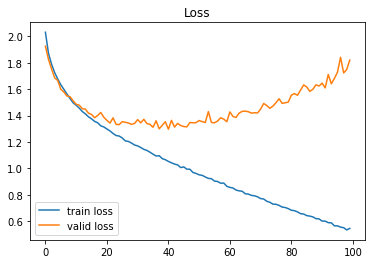

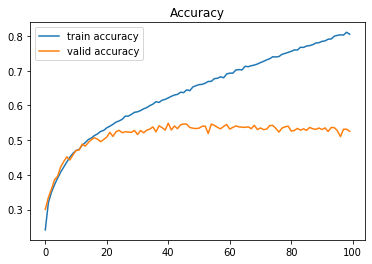

In [18]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()